In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import pickle5 as pickle
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# check version number
import imblearn
print(imblearn.__version__)

0.7.0


In [3]:
#Change to your path

In [4]:
# !pip3 install pickle5
# import pickle5 as pickle

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# path=r'/content/drive/MyDrive'
path=r'E:\University\Tehran University_Arshad\Terme 2\Machine learning\00Final Project'
df=pickle.load(open(f"{path}/ml_project_dataset.pkl", "rb"))

In [7]:
Data=df.values
# df

In [8]:
for i in range(5):
    print(df['f'+str(i+1)][1000].shape[0])

512
1536
2304
2560
204


In [9]:
#Arranging gender label
print(np.unique(Data[ :,1]))
Gender = Data[ : , 1]
indices_f = [i for i, x in enumerate(Gender) if x == 'F' or x =='female' ]
indices_m = [i for i, x in enumerate(Gender) if x == 'M' or x =='male' or x == 'm' ]

for i in (indices_f): Gender[i] = 'Female'
for i in (indices_m): Gender[i] = 'Male'
Data[ : , 1] = Gender
print(np.unique(Data[ : , 1]))  # Done

['F' 'Female' 'M' 'Male' 'female' 'm' 'male']
['Female' 'Male']


In [10]:
#Arranging Status label
print(np.unique(Data[ :,2]))
status = Data[ : ,2]
indices_S = [i for i, x in enumerate(status) if x == 'sad' or x =='S' ]
indices_H = [i for i, x in enumerate(status) if x == 'H' or x =='happy' or x == 'happy ' ]
indices_N = [i for i, x in enumerate(status) if x == 'N' or x =='Normal' or x =='natural'  or x=='neutral']

for i in (indices_S): status[i] = 'Sad'
for i in (indices_H): status[i] = 'Happy'
for i in (indices_N): status[i] = 'Neutral'

indices_fake =[i for i, x in enumerate(status) if x != 'Sad' and x !='Happy' and x!= 'Neutral' ]
print(indices_fake)
Data[ : , 2] = status

['0040a40fde' '0041a40fde' '0042a40fde' '0043a40fde' '0044a40fde'
 '0045a40fde' '0046a40fde' '0047a40fde' '0048a40fde' '0049a40fde'
 '0050a40fde' '0051a40fde' '0052a40fde' '0053a40fde' '0054a40fde'
 '0d02ffb6f1' '0d02ffb6f10' '0d02ffb6f11' '0d02ffb6f12' '0d02ffb6f13'
 '0d02ffb6f14' '0d02ffb6f15' '0d02ffb6f2' '0d02ffb6f3' '0d02ffb6f4'
 '0d02ffb6f5' '0d02ffb6f6' '0d02ffb6f7' '0d02ffb6f8' '0d02ffb6f9'
 '597e0ee7bf' '598e0ee7bf' '599e0ee7bf' '600e0ee7bf' '601e0ee7bf'
 '602e0ee7bf' '603e0ee7bf' '604e0ee7bf' '605e0ee7bf' '606e0ee7bf'
 '607e0ee7bf' '608e0ee7bf' '609e0ee7bf' '610e0ee7bf' '611e0ee7bf'
 '77ae9e7a38' '77ae9e7a39' '77ae9e7a40' '77ae9e7a41' '77ae9e7a42'
 '77ae9e7a43' '77ae9e7a44' '77ae9e7a45' '77ae9e7a46' '77ae9e7a47'
 '77ae9e7a48' '77ae9e7a49' '77ae9e7a50' '77ae9e7a51' '77ae9e7a52' 'H'
 'Happy' 'N' 'Neutral' 'Normal' 'S' 'Sad' 'happy' 'happy ' 'natural'
 'neutral' 'sad']
[18, 75, 126, 137, 148, 154, 185, 186, 209, 244, 254, 297, 327, 351, 355, 378, 380, 427, 452, 495, 562, 593, 62

In [11]:
#Removing fake datas
Data = [Data[x , : ] for x in range(len(Data[: , 0])) if x not in (indices_fake)]
Data = np.array(Data)

In [12]:
print(np.unique(Data[ : , 0]))
print(np.unique(Data[ : , 1]))
print(np.unique(Data[ : , 2]))
#All checked

[5 6 7 8 9 10 11 12 14 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 33 34 35 38 40 44 46 47 49 50 51 52 54 55 56 57 58 59 60 62 82]
['Female' 'Male']
['Happy' 'Neutral' 'Sad']


In [13]:
# Data.shape

In [14]:
#check biasing 
num_H = len( [i for i, x in enumerate(Data[ : , 2]) if x == 'Happy'])
num_N = len( [i for i, x in enumerate(Data[ : , 2]) if x == 'Neutral'])
num_S = len( [i for i, x in enumerate(Data[ : , 2]) if x == 'Sad'])
print(num_H , num_N , num_S) # No need for upsampling

num_f = len( [i for i, x in enumerate(Data[ : , 1]) if x == 'Female'])
num_m = len( [i for i, x in enumerate(Data[ : , 1]) if x == 'Male'])
print(num_f , num_m) #Need upsampling

846 851 848
902 1643


In [15]:
#Remove NANs
f1 = list(Data[ : , 3])
f2 = list(Data[ : , 4])
f3 = list(Data[ : , 5])
f4 = list(Data[ : , 6])
f5 = list(Data[ : , 7])

f1= np.array(f1)
f2= np.array(f2)
f3= np.array(f3)
f4= np.array(f4)
f5= np.array(f5)

nan_f1 = np.argwhere(np.isnan(f1))
nan_f2 = np.argwhere(np.isnan(f2))
nan_f3 = np.argwhere(np.isnan(f3))
nan_f4 = np.argwhere(np.isnan(f4))
nan_f5 = np.argwhere(np.isnan(f5))

#print(f1[ : , 2].shape)


In [16]:
col_meanf1 = np.nanmean(f1 , axis = 0)
col_meanf2 = np.nanmean(f2 , axis = 0)
col_meanf3 = np.nanmean(f3 , axis = 0)
col_meanf4 = np.nanmean(f4 , axis = 0)
col_meanf5 = np.nanmean(f5 , axis = 0)

inds1 = np.where(np.isnan(f1))
f1[inds1] = np.take(col_meanf1 , inds1[1])
inds2 = np.where(np.isnan(f2))
f2[inds2] = np.take(col_meanf2 , inds2[1])
inds3 = np.where(np.isnan(f3))
f3[inds3] = np.take(col_meanf3 , inds3[1])
inds4 = np.where(np.isnan(f4))
f4[inds4] = np.take(col_meanf4 , inds4[1])
inds5 = np.where(np.isnan(f5))
f5[inds5] = np.take(col_meanf5 , inds5[1])

nan_f1 = np.argwhere(np.isnan(f1))
nan_f2 = np.argwhere(np.isnan(f2))
nan_f3 = np.argwhere(np.isnan(f3))
nan_f4 = np.argwhere(np.isnan(f4))
nan_f5 = np.argwhere(np.isnan(f5))

print(nan_f1 , nan_f2 , nan_f3 , nan_f4 , nan_f5) #All checked     # Need to be more clean 

[] [] [] [] []


In [ ]:
# import seaborn as sns
# df_new = pd.DataFrame(p[0],p[1]*10)
# # df_new
# sns.distplot(df_new[0], hist=True, kde=True, 
#              bins=int(180/15), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 3})

# Choose The Data

In [18]:
#inputsss
inn=f3
n_pc=6

In [19]:
x_data=inn.copy()
y_data=Data[:,0].copy()         #Chnage this line to Gender & Status
y_data.shape,x_data.shape

((2545,), (2545, 2304))

Text(0.5, 1.0, 'Age Distribution over the Dataset')

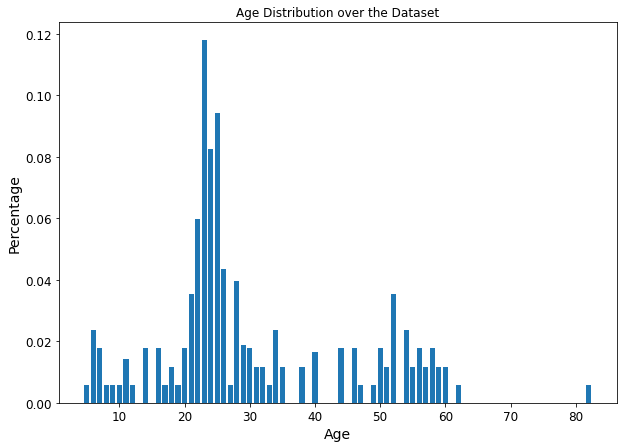

In [21]:
p=np.unique(y_data,return_counts=True)
p[0].shape,p[1].shape
plt.figure(figsize=(10,7))
plt.bar(p[0],p[1]/2545)

plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Age Distribution over the Dataset')

In [22]:
# split the dataset into train and test for 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=40)

In [23]:
y_true=y_test.copy()

In [24]:
# normalize the dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
# sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
# x_train,x_test

In [26]:
scalar=MinMaxScaler()
y_train=scalar.fit_transform(y_train.reshape(-1, 1))
y_test=scalar.transform(y_test.reshape(-1, 1))

# PCA


<Figure size 432x288 with 0 Axes>

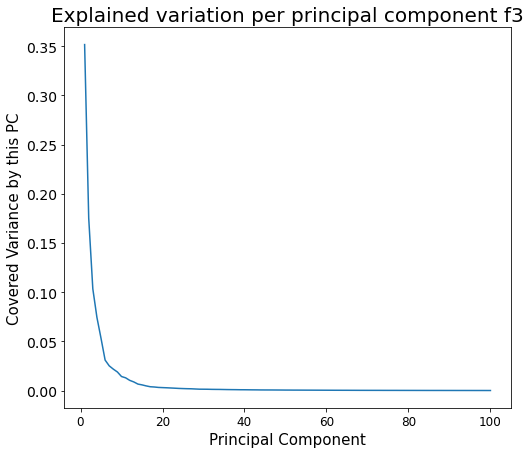

0.9659676512051654

In [27]:
# for f3
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
principalComponentsf = pca.fit_transform(f3)

xs = np.array(range(1,101))
plt.figure()
plt.figure(figsize=(8,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.plot(xs, pca.explained_variance_ratio_) # to see principle ones    #####  50 is enough
plt.xlabel('Principal Component',fontsize=15)
plt.ylabel('Covered Variance by this PC',fontsize=15)
plt.title("Explained variation per principal component f3",fontsize=20)
plt.show()
np.sum(pca.explained_variance_ratio_[:40])

In [28]:
# np.sum(pca.explained_variance_ratio_[:15])

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=n_pc)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

In [30]:
x_train.shape,x_test.shape

((1908, 6), (637, 6))

# SVR With Gridseach

In [31]:
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.model_selection import GridSearchCV
pipe_svr = Pipeline([('scaler', StandardScaler()), ('SVM', svm.SVR(kernel = 'rbf'))])  #StandardScaler
parameteres_svr = {'SVM__C':[1], 'SVM__gamma':[0.1,0.15]
              ,'SVM__epsilon':[0.04]}
model_SVR = GridSearchCV(pipe_svr, param_grid=parameteres_svr, cv=2)
model_SVR.fit(x_train, y_train.ravel())
print ('R squared metric for the model is:',abs(model_SVR.score(x_test,y_test)))
print ('best parameters of the model are:',model_SVR.best_params_)

R squared metric for the model is: 0.6371133626363061
best parameters of the model are: {'SVM__C': 1, 'SVM__epsilon': 0.04, 'SVM__gamma': 0.1}


In [32]:
h=np.where((y_true>65))[0].tolist()
v=np.where((y_true<17))[0].tolist()
gg=np.concatenate((h,v),axis=None).reshape(-1,1)

x_test_new=np.delete(x_test, gg, 0)
y_test_new=np.delete(y_test, gg, 0)
y_true_new=np.delete(y_true, gg, 0)
# x_test.shape

In [33]:
y_pred1=model_SVR.predict(x_test_new)             #check this line
y_pred=scalar.inverse_transform(y_pred1.reshape(-1,1))

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(y_true_new,y_pred))
print(mean_absolute_error(y_true_new,y_pred))

62.44873544704016
5.015787391489767


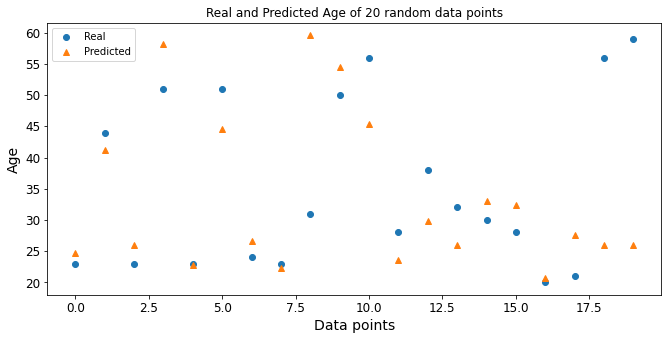

In [35]:
plt.figure(figsize=(11,5))
a=np.random.randint(1,500,20)   #generate 20 random test numbersto show
plt.plot(y_true_new[a],'o',label='Real')
plt.plot(abs(y_pred[a]),'^',label='Predicted')
plt.title('Real and Predicted Age of 20 random data points')
plt.ylabel('Age')
plt.xlabel('Data points')
plt.legend()

# Polynomial

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,SGDRegressor
degree=3
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())        #SGDRegressor
polyreg.fit(x_train,y_train)
print ('R squared metric for the model is:',polyreg.score(x_test,y_test))

R squared metric for the model is: 0.593062402465392


In [37]:
y_pred1=polyreg.predict(x_test)             #check this line
y_pred=scalar.inverse_transform(y_pred1.reshape(-1,1))

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(y_true,y_pred))
print(mean_absolute_error(y_true,y_pred))

90.87122775153487
6.521419809101156


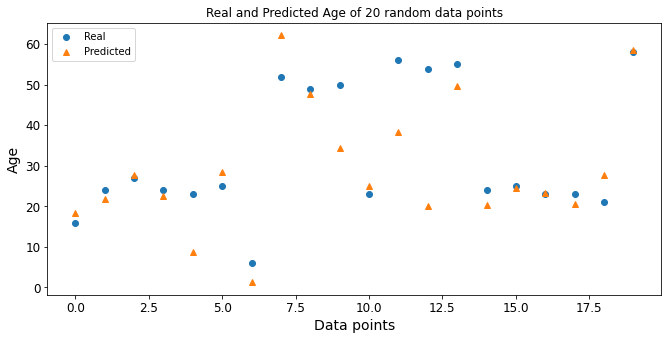

In [39]:
plt.figure(figsize=(11,5))
a=np.random.randint(1,500,20)   #generate 20 random test numbersto show
plt.plot(y_true[a],'o',label='Real')
plt.plot(abs(y_pred[a]),'^',label='Predicted')
plt.title('Real and Predicted Age of 20 random data points')
plt.ylabel('Age')
plt.xlabel('Data points')
plt.legend()